# Helmholtz Coil Simulation

### Camille Gomez-Laberge
Northeastern University

October 26, 2023

Written for my student Madhav Kapa as starter simulation code to design and test Helmholtz Cage design. Based on my EM project code for simulating B-fields using Biot-Savart law (Harvard University, 2021).

This code is provided as-is to serve as an example for Madhav's engineering project.

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Function to model a loop of current

In [4]:
def discretizeI(radius, total_current, Npts, z_position):
    """
    Function discretizes a loop of current, and returns arrays of 
    discretized current positions and current-flow vectors
    
    Parameters:
    -----------
    radius: float
        the radius of the loop (centered around zero)
    
    total_current: float
        the magnitude of the current flow vector
    
    Npts: integer
        the number of differential current elements
    
    z_position: float
        the z value for the current loop
    
    Returns:
    --------
    r_pos: numpy array
    returns a 3xNpts array.
        columns are the discrete current elements (Npts of them)
        rows are the [x, y, z] positions of the that current element
        
    I_vec: numpy array
    returns a 3xNpts array.
        columns are the discrete current elements (Npts of them)
        rows are the current vector of the form [I_x, I_y, I_z]
    """
    
    #Start by making a list of unit vectors for each of the current elements
    # (note we use Npts + 1 here because 0 = 2pi)
    thetas = np.linspace(0,2*np.pi,Npts+1)
    r_x = np.cos(thetas)
    r_y = np.sin(thetas)
    r_pos = np.array([radius*r_x,radius*r_y, z_position*np.ones_like(r_x)]).T[:-1] # ignore the point 2pi
    
    # Unit vectors for the currents can be computed by finding the unit vector (z cross r)
    I_vec = total_current * np.cross(np.array([0,0,1]), r_pos)
    
    return r_pos, I_vec

## Function to calculate B-field using Biot-Savart law

In [5]:
def biotS(r_calc, r_Is, Is):
    """
    Calculates the magnetic field at a position in space r_calc based on 
    a list of differential current elements (Is) at positions r_Is
    
    Parameters:
    -----------
    r_calc: numpy array
    3x1 array of where to calculate the field (of the form [x,y,z])
    
    r_Is: numpy array
    3xN array of current positions
    
    Is: numpy array
    3xN array of current flow directions
    
    Returns:
    --------
    B_out: numpy array
    3x1 array of the output field at position r_calc
    """
    dBs = np.zeros_like(r_Is)
    for index, ri in enumerate(r_Is):
        r = np.linalg.norm(r_calc - ri)
        dBs[index] = np.cross(Is[index], (r_calc - ri))/(r**3)
    return np.sum(dBs, axis=0)

## Function to setup spatial domain for computations

In [6]:
def spatialdomain(x_range, z_range, x_n, z_n):
    '''
    Setup a spatial domain in xz-plane 
    
    Parameters:
    -----------
    x_range, y_range: float
        The range of the domiain going from -range/2 to +range/2
                
    x_n, z_n : integer
        The number of points along the x and z directions
    
    Returns:
    --------
    XX, ZZ : meshgrids
        Meshgrids for the domain
    
    '''
    
    x = np.linspace(-x_range/2, x_range/2, x_n)
    z = np.linspace(-z_range/2, z_range/2, z_n)
    [XX, ZZ] = np.meshgrid(x, z)
    
    return XX, ZZ

## Setup the current loop and plot $B_z$ component along $x$-axis

Text(0.5, 0, 'x (distance)')

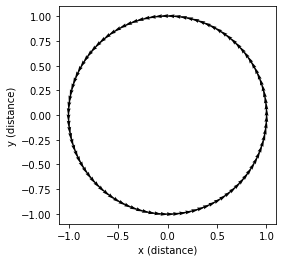

In [8]:
# Current loop model with radius 1 and 100 segments
positions, currents = discretizeI(1,1,100,0)
plt.quiver(positions[:,0], positions[:,1], currents[:,0], currents[:,1])
plt.gca().set_aspect('equal')
plt.ylabel("y (distance)")
plt.xlabel("x (distance)")

(-500, 500)

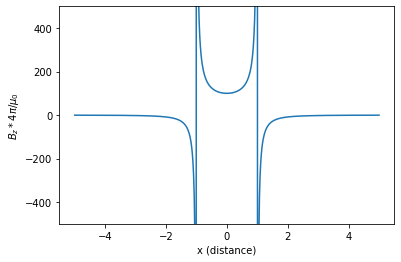

In [9]:
# Calculate B-field along x-axis
Xarray = np.linspace(-5,5,500)
Barray = np.zeros_like(Xarray)

for index, x in enumerate(Xarray):
    #take only the B_z component
    Barray[index] = biotS(np.array([x,0,0]),positions, currents)[2]

# Make a nice plot
plt.plot(Xarray,Barray)
plt.ylabel("$B_z*4\pi/\mu_0$")
plt.xlabel("x (distance)")
plt.ylim(-500, 500)

## Plot $B_z$ component along $z$-axis

(-10, 150)

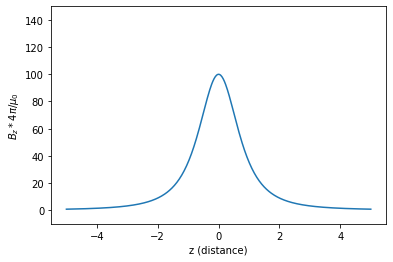

In [10]:
# Calculate B-field along z-axis
Zarray = np.linspace(-5,5,500)
Barray = np.zeros_like(Zarray)

for index, z in enumerate(Zarray):
    #take only the B_z component
    Barray[index] = biotS(np.array([0,0,z]),positions, currents)[2]

# Make a nice plot
plt.plot(Zarray,Barray)
plt.ylabel("$B_z*4\pi/\mu_0$")
plt.xlabel("z (distance)")
plt.ylim(-10, 150)

As you can see, $B_z$ is not uniform near the origin; it falls off quickly.

## Setup one current loop and plot $\vec B (x,z)$ in the $xz$-plane

In [11]:
# Current loop model with radius 1 and 100 segments
positions, currents = discretizeI(1,1,100,0)
XX, ZZ = spatialdomain(5,5,23,23)

# B-field components
BBx = np.zeros_like(XX)
BBz = np.zeros_like(ZZ)

for ix in range(len(XX)):
    for iz in range(len(ZZ)):
        B = biotS(np.array([XX[ix,iz], 0, ZZ[ix,iz]]), positions, currents)
        BBx[ix,iz] = B[0]
        BBz[ix,iz] = B[2]

(-10, 150)

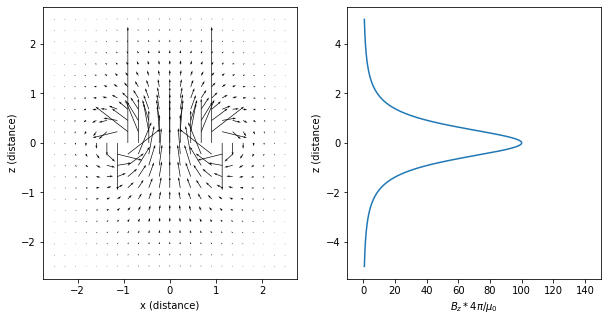

In [12]:
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(121)
plt.quiver(XX, ZZ, BBx, BBz)
plt.xlabel("x (distance)")
plt.ylabel("z (distance)")
ax1 = f.add_subplot(122)
# Make a nice plot
plt.plot(Barray,Zarray)
plt.xlabel("$B_z*4\pi/\mu_0$")
plt.ylabel("z (distance)")
plt.xlim(-10, 150)

## Setup two current loops and plot $\vec B (x,z)$ in the $xz$-plane

In [13]:
# Two current loops separated by the optimal distance L=R=1
L = 1
positions1, currents1 = discretizeI(1,1,50,-L/2)
positions2, currents2 = discretizeI(1,1,50,+L/2)

positions = np.concatenate((positions1,positions2))
currents = np.concatenate((currents1,currents2))

XX, ZZ = spatialdomain(5,5,23,23)

# B-field components
BBx = np.zeros_like(XX)
BBz = np.zeros_like(ZZ)

for ix in range(len(XX)):
    for iz in range(len(ZZ)):
        B = biotS(np.array([XX[ix,iz], 0, ZZ[ix,iz]]), positions, currents)
        BBx[ix,iz] = B[0]
        BBz[ix,iz] = B[2]

(-10, 150)

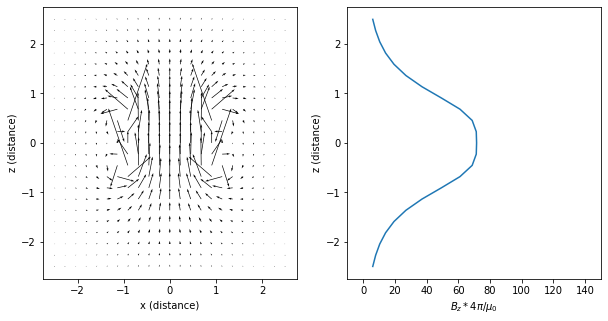

In [16]:
f = plt.figure(figsize=(10, 5))
ax1 = f.add_subplot(121)
plt.quiver(XX, ZZ, BBx, BBz)
plt.xlabel("x (distance)")
plt.ylabel("z (distance)")

ax1 = f.add_subplot(122)
plt.plot(BBz[:,11],ZZ[:,11])
plt.xlabel("$B_z*4\pi/\mu_0$")
plt.ylabel("z (distance)")
plt.xlim(-10, 150)

## Defining a Helmholtz function
This function wraps up all the tools above to simulate a Helmholtz coil. You can play around with it by varying the input parameters and comparing resuting the B-fields. HAVE FUN!

In [18]:
def helmholtz(XX,ZZ,r,n,L):
    '''
    Setup a Helmholtz B-field in the xz-plane 
    
    Parameters:
    -----------
    XX, ZZ : meshgrids
        Meshgrids for the domain
    
    r: float
        The radius of the coils
        
    n: integer
        The number of current elements in each current loop
        
    L: float
        The intercoil distance
    
    Returns:
    --------
    BBx, BBz : numpy arrays
        XX-sized arrays for B_x and B_z field components
    '''
    positions1, currents1 = discretizeI(r,1,n,-L/2)
    positions2, currents2 = discretizeI(r,1,n,+L/2)

    positions = np.concatenate((positions1,positions2))
    currents = np.concatenate((currents1,currents2))

    # B-field components
    BBx = np.zeros_like(XX)
    BBz = np.zeros_like(ZZ)

    for ix in range(len(XX)):
        for iz in range(len(ZZ)):
            B = biotS(np.array([XX[ix,iz], 0, ZZ[ix,iz]]), positions, currents)
            BBx[ix,iz] = B[0]
            BBz[ix,iz] = B[2]
            
    return BBx,BBz

In [19]:
XX, ZZ = spatialdomain(4,4,23,23)
BBx1,BBz1 = helmholtz(XX,ZZ,1,20,1/2)
BBx2,BBz2 = helmholtz(XX,ZZ,1,20,1)  # The optimal distance is this one
BBx3,BBz3 = helmholtz(XX,ZZ,1,20,3/2)

(-5, 50)

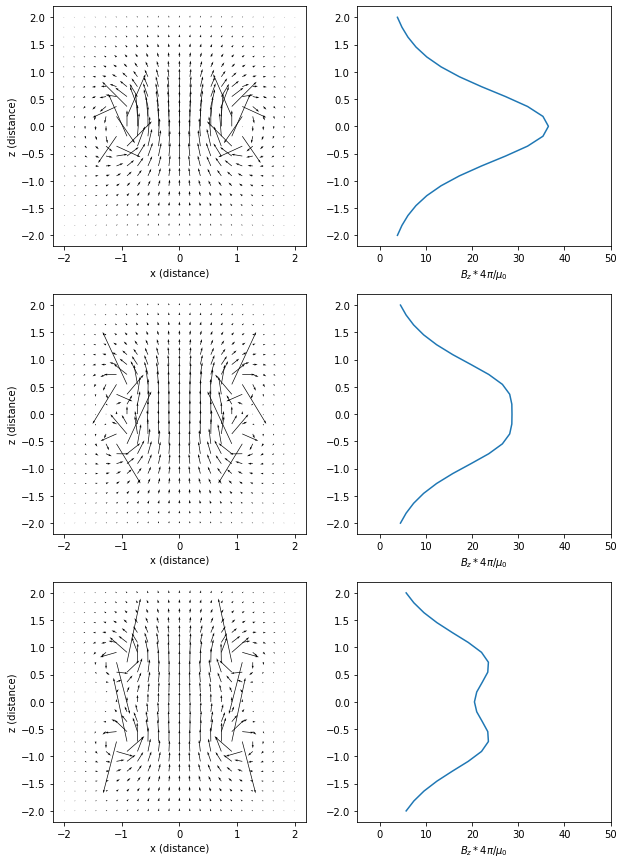

In [20]:
f = plt.figure(figsize=(10, 15))
ax1 = f.add_subplot(321)
plt.quiver(XX, ZZ, BBx1, BBz1)
plt.xlabel("x (distance)")
plt.ylabel("z (distance)")
ax1 = f.add_subplot(322)
# Make a nice plot
plt.plot(BBz1[:,11],ZZ[:,11])
plt.xlabel("$B_z*4\pi/\mu_0$")
plt.xlim(-5, 50)

ax1 = f.add_subplot(323)
plt.quiver(XX, ZZ, BBx2, BBz2)
plt.xlabel("x (distance)")
plt.ylabel("z (distance)")
ax1 = f.add_subplot(324)
# Make a nice plot
plt.plot(BBz2[:,11],ZZ[:,11])
plt.xlabel("$B_z*4\pi/\mu_0$")
plt.xlim(-5, 50)

ax1 = f.add_subplot(325)
plt.quiver(XX, ZZ, BBx3, BBz3)
plt.xlabel("x (distance)")
plt.ylabel("z (distance)")
ax1 = f.add_subplot(326)
# Make a nice plot
plt.plot(BBz3[:,11],ZZ[:,11])
plt.xlabel("$B_z*4\pi/\mu_0$")
plt.xlim(-5, 50)